In [1]:
!pip install wheel matplotlib pandas matplotlib seaborn sklearn pickle-mixin

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
PROJECT_DIR = os.path.dirname(os.path.abspath(r"Stroke Prediction using 5 ML Algorthms.ipynb"))
plt.rcParams['figure.figsize'] = (5, 5)

In [7]:
data=pd.read_csv(PROJECT_DIR + r'/dataset/healthcare-dataset-stroke-data-new.csv')

In [8]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
546,42359,Male,9.0,0,0,No,children,Urban,122.22,17.7,Unknown,0
547,20751,Female,26.0,0,0,Yes,Private,Rural,75.29,22.6,smokes,0
548,34641,Male,40.0,0,0,No,Private,Rural,100.35,28.1,never smoked,0
549,15791,Male,77.0,0,0,Yes,Private,Urban,193.83,26.5,never smoked,0


In [9]:
stroke_test = data['stroke']


In [10]:
a = 0
for num in stroke_test:
    a = a + num
a

249

# Exploratory data analysis

In [11]:
data.shape

(551, 12)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 551 non-null    int64  
 1   gender             551 non-null    object 
 2   age                551 non-null    float64
 3   hypertension       551 non-null    int64  
 4   heart_disease      551 non-null    int64  
 5   ever_married       551 non-null    object 
 6   work_type          551 non-null    object 
 7   Residence_type     551 non-null    object 
 8   avg_glucose_level  551 non-null    float64
 9   bmi                505 non-null    float64
 10  smoking_status     551 non-null    object 
 11  stroke             551 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 51.8+ KB


In [13]:
data.isnull().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  46
smoking_status        0
stroke                0
dtype: int64

# Lets fill Null Values

In [14]:
data['bmi'].value_counts()

27.3    9
31.0    7
28.5    6
26.4    6
31.1    6
       ..
41.1    1
16.5    1
21.6    1
43.1    1
19.7    1
Name: bmi, Length: 240, dtype: int64

In [15]:
data['bmi'].describe()

count    505.000000
mean      30.242178
std        7.919635
min       13.800000
25%       25.100000
50%       28.900000
75%       34.400000
max       71.900000
Name: bmi, dtype: float64

In [16]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [17]:
data['bmi'].describe()

count    551.000000
mean      30.242178
std        7.581220
min       13.800000
25%       25.450000
50%       29.700000
75%       33.700000
max       71.900000
Name: bmi, dtype: float64

In [18]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [19]:
data.drop('id',axis=1,inplace=True)

In [20]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.242178,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
546,Male,9.0,0,0,No,children,Urban,122.22,17.700000,Unknown,0
547,Female,26.0,0,0,Yes,Private,Rural,75.29,22.600000,smokes,0
548,Male,40.0,0,0,No,Private,Rural,100.35,28.100000,never smoked,0
549,Male,77.0,0,0,Yes,Private,Urban,193.83,26.500000,never smoked,0


# Outlier Removation

In [21]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

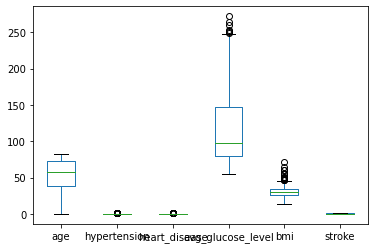

In [22]:
data.plot(kind='box')
plt.show()

# Label Encoding

In [23]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.242178,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [24]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

/home/mr_francis/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [25]:
gender=enc.fit_transform(data['gender'])

In [26]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [27]:
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [28]:
data['work_type']=work_type

In [29]:
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender

In [30]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,30.242178,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
546,1,9.0,0,0,0,4,1,122.22,17.700000,0,0
547,0,26.0,0,0,1,2,0,75.29,22.600000,3,0
548,1,40.0,0,0,0,2,0,100.35,28.100000,2,0
549,1,77.0,0,0,1,2,1,193.83,26.500000,2,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             551 non-null    int64  
 1   age                551 non-null    float64
 2   hypertension       551 non-null    int64  
 3   heart_disease      551 non-null    int64  
 4   ever_married       551 non-null    int64  
 5   work_type          551 non-null    int64  
 6   Residence_type     551 non-null    int64  
 7   avg_glucose_level  551 non-null    float64
 8   bmi                551 non-null    float64
 9   smoking_status     551 non-null    int64  
 10  stroke             551 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 47.5 KB


# Splitting the data for train and test

X ---train_X,test_X  80/20                   
Y ---train_Y,test_Y

In [32]:
X=data.drop('stroke',axis=1)

In [33]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,30.242178,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [34]:
Y=data['stroke']

In [35]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
546    0
547    0
548    0
549    0
550    0
Name: stroke, Length: 551, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [37]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
308,0,30.0,0,0,1,2,1,61.45,36.7,3
152,0,80.0,0,0,1,3,1,76.57,34.1,2
467,0,43.0,1,0,0,3,0,217.30,27.5,2
172,0,60.0,0,0,1,2,1,97.43,26.4,3
431,1,31.0,0,0,1,0,0,91.65,24.6,1
...,...,...,...,...,...,...,...,...,...,...
369,0,4.0,0,0,0,4,0,93.25,16.6,0
320,1,22.0,0,0,0,2,0,103.56,25.1,0
527,0,30.0,0,0,1,0,1,113.85,34.0,2
125,0,72.0,0,0,1,0,1,131.41,28.4,2


In [38]:
Y_train

308    0
152    1
467    0
172    1
431    0
      ..
369    0
320    0
527    0
125    1
265    0
Name: stroke, Length: 440, dtype: int64

In [39]:
c=0
for num in Y_train:
    c = c + num
c

200

In [40]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
387,1,24.0,0,0,0,2,1,123.10,37.9,2
252,0,70.0,0,0,1,2,0,69.04,35.9,1
225,0,57.0,0,1,1,2,1,216.58,31.0,0
325,1,76.0,0,0,1,2,0,234.58,34.3,1
226,0,81.0,0,0,1,2,0,184.40,27.5,2
...,...,...,...,...,...,...,...,...,...,...
212,1,63.0,0,0,1,2,1,208.65,30.7,2
266,0,42.0,0,0,1,2,0,82.67,22.5,2
348,0,25.0,0,0,0,2,0,66.30,27.2,2
282,0,3.0,0,0,0,4,1,73.74,16.0,0


In [41]:
Y_test

387    0
252    0
225    1
325    0
226    1
      ..
212    1
266    0
348    0
282    0
88     1
Name: stroke, Length: 111, dtype: int64

# Normalize

In [42]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,0.404719,53.847260,0.170599,0.108893,0.771325,2.112523,0.502722,119.961742,30.242178,1.441016,0.451906
std,0.491284,22.102256,0.376500,0.311788,0.420361,1.000930,0.500447,55.107228,7.581220,1.046060,0.498134
min,0.000000,0.640000,0.000000,0.000000,0.000000,0.000000,0.000000,55.390000,13.800000,0.000000,0.000000
25%,0.000000,39.000000,0.000000,0.000000,1.000000,2.000000,0.000000,79.235000,25.450000,0.000000,0.000000
50%,0.000000,58.000000,0.000000,0.000000,1.000000,2.000000,1.000000,97.550000,29.700000,2.000000,0.000000
75%,1.000000,73.000000,0.000000,0.000000,1.000000,3.000000,1.000000,146.745000,33.700000,2.000000,1.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,5.000000,1.000000,271.740000,71.900000,3.000000,1.000000


In [43]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [44]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

# lets save the scaler object

In [45]:
import pickle
import os

In [46]:
scaler_path=os.path.join(PROJECT_DIR + r'/models/scalar1.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [47]:
X_train_std

array([[-0.81649658, -1.10307773, -0.46779971, ..., -1.0592157 ,
         0.82336695,  1.47115119],
       [-0.81649658,  1.17174426, -0.46779971, ..., -0.78985502,
         0.47641222,  0.52062766],
       [-0.81649658, -0.51162401,  2.13766701, ...,  1.71723022,
        -0.404319  ,  0.52062766],
       ...,
       [-0.81649658, -1.10307773, -0.46779971, ..., -0.12571704,
         0.46306781,  0.52062766],
       [-0.81649658,  0.80777274, -0.46779971, ...,  0.1871119 ,
        -0.28421929,  0.52062766],
       [-0.81649658, -1.55804212, -0.46779971, ..., -0.64644539,
        -1.44518318,  1.47115119]])

In [48]:
X_test_std

array([[ 1.22474487, -1.37605636, -0.46779971, ...,  0.03907042,
         0.9834999 ,  0.52062766],
       [-0.81649658,  0.71677986, -0.46779971, ..., -0.92400091,
         0.71661165, -0.42989587],
       [-0.81649658,  0.12532615, -0.46779971, ...,  1.70440353,
         0.06273543, -1.3804194 ],
       ...,
       [-0.81649658, -1.33055992, -0.46779971, ..., -0.97281363,
        -0.44435224,  0.52062766],
       [-0.81649658, -2.3314816 , -0.46779971, ..., -0.84027107,
        -1.93892644, -1.3804194 ],
       [ 1.22474487, -0.32963825, -0.46779971, ..., -0.60511492,
         1.4105211 , -0.42989587]])

# Training

# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [50]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [51]:
dt.feature_importances_

array([0.01944314, 0.43260412, 0.02043403, 0.04051912, 0.01682374,
       0.02112349, 0.0316096 , 0.1723476 , 0.19248237, 0.05261279])

In [52]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [53]:
Y_pred=dt.predict(X_test_std)

In [54]:
Y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0])

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [57]:
ac_dt

0.6576576576576577

In [58]:
import joblib
model_path=os.path.join(PROJECT_DIR + r'/models/dt.sav')
joblib.dump(dt,model_path)

['/home/mr_francis/Documents/Work/stroke_prediction/models/dt.sav']

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [60]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [61]:
Y_pred_lr=lr.predict(X_test_std)

In [62]:
Y_pred_lr

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0])

In [63]:
ac_lr=accuracy_score(Y_test,Y_pred_lr)

In [64]:
ac_lr

0.7297297297297297

# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [66]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [67]:
Y_pred=knn.predict(X_test_std)

In [68]:
ac_knn=accuracy_score(Y_test,Y_pred)

In [69]:
ac_knn

0.6936936936936937

# Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [71]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [72]:
Y_pred=rf.predict(X_test_std)

In [73]:
ac_rf=accuracy_score(Y_test,Y_pred)

In [74]:
ac_rf

0.6936936936936937

In [75]:
ac_knn

0.6936936936936937

In [76]:
ac_dt

0.6576576576576577

In [77]:
ac_lr

0.7297297297297297

# SVM

In [78]:
from sklearn.svm import SVC

In [79]:
sv=SVC()

In [80]:
sv.fit(X_train_std,Y_train)

SVC()

In [81]:
Y_pred=sv.predict(X_test_std)

In [82]:
ac_sv=accuracy_score(Y_test,Y_pred,normalize=True)

In [83]:
ac_sv

0.7117117117117117

In [84]:
ac_lr

0.7297297297297297

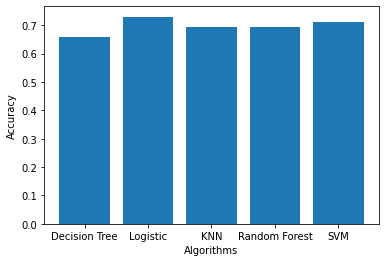

In [85]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [86]:
import joblib
model_path=os.path.join(PROJECT_DIR + r'/models/svm.sav')
joblib.dump(sv,model_path)

['/home/mr_francis/Documents/Work/stroke_prediction/models/svm.sav']